# Data Ingress

Data Ingress is the consumption of data into the database. This is a key aspect of a digital twin. 

This example will demonstrate the simplest scenario of a one-off data ingress into a local deployment of DTBase. 

This example assumes the user has already completed example 000 and therefore has a working locally deployed instance of dtbase. 

## Weather Ingress

This example will demonstrate how to ingress weather data from an online API into the dtbase.

### tomorrow.io 

In this example, we will use [tomorrow.io](https://app.tomorrow.io) to access weather data. It is free and has an easy sign up. To access the API, the user will need an API key which is acquired by signing up to the platform.  

Once you have the API key, put it in the `.secrets/dtenv_localdb.sh` file: 

```
export DT_TOMORROW_APIKEY="<insert-API-key-here>"
```

Lets quiickly test this API key is working:

In [2]:
# Load environment variables from .secrets/dtenv_localdb.sh
import os
import requests
import pandas as pd

env_vars = !cat ../.secrets/dtenv_localdb.sh
env_vars = [x for x in env_vars if x.startswith('export')]

for env_var in env_vars:
    key, value = env_var.split(' ')[1].split('=')
    # remove string quotes from value
    value = value.strip('\"')
    os.environ[key] = value

api_key = os.getenv('DT_TOMORROW_APIKEY')

In [14]:
url = f"https://api.tomorrow.io/v4/weather/forecast?location=new%20york&apikey={api_key}"
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)
response

<Response [200]>

Response 200 is what we're looking for. Lets quickly wrangle the data into a dataframe and plot it to make sure it looks sensible. 

<Axes: title={'center': 'Temperature in New York'}, xlabel='datetime', ylabel='Temperature (°C)'>

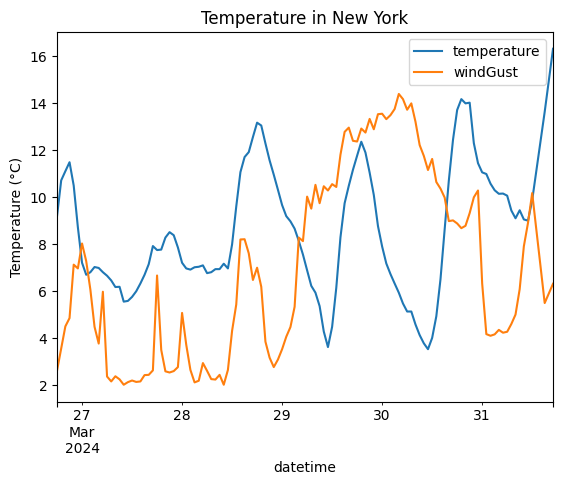

In [34]:
# Extract minutely data
data = response.json()['timelines']['hourly']

flat_data = [{'time': entry['time'], **entry['values']} for entry in data]
df = pd.DataFrame(flat_data)
df['datetime'] = pd.to_datetime(df['time'])
df.head()

df.plot(x='datetime', y=['temperature', 'windGust'], title='Temperature in New York', ylabel='Temperature (°C)')

### BaseIngress

For a user to write their own custom data ingress, they need to create a new class and inherit from the BaseIngress class. 

The Baseingress class handles the authentication and responses. The user only needs to overwrite the `get_service_data()`.  

More information can be found in the docs. 